# Classification:Logistic Regression

### Importing the necessary packages

In [2]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

### Load the dataset

In [4]:
heart = pd.read_csv('heart.csv')

### Data Exploration: Understanding the dataset and key features.

In [6]:
#show total rows and columns of the DataFrame
heart.shape

(1025, 14)

In [7]:
# show first 5 rows of the data
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
# show data info
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
# discribe the data
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# check for null values
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
# see how many rows for each of the pain type in column 'cp'
heart['cp'].value_counts()

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

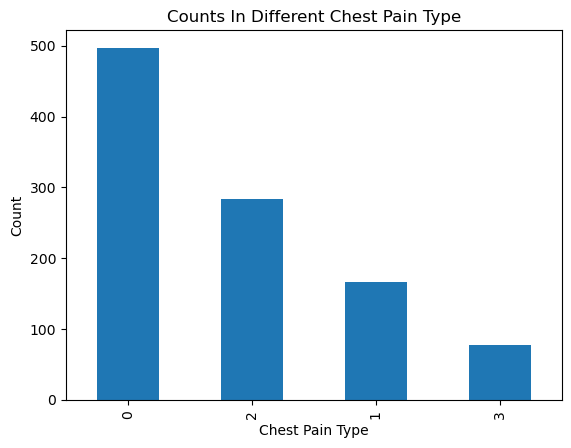

In [12]:
# plot the counts of each category in the 'cp' columns as a bar chart
ax = heart['cp'].value_counts().plot(kind='bar', title='Counts In Different Chest Pain Type')
ax.set_xlabel('Chest Pain Type')
ax.set_ylabel('Count');

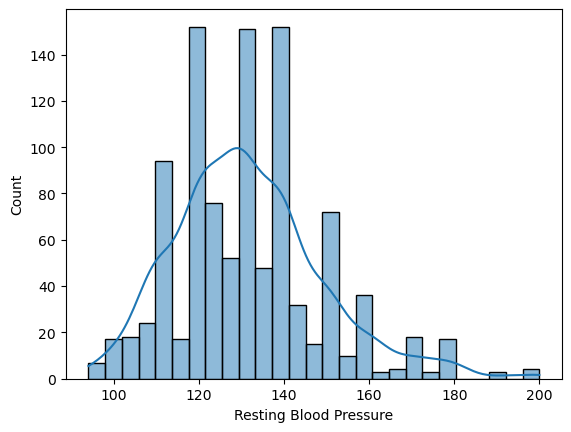

In [13]:
#plot a hisplot to understand the data
sns.histplot(data=heart, x='trestbps', kde=True)
plt.xlabel("Resting Blood Pressure")
plt.show()

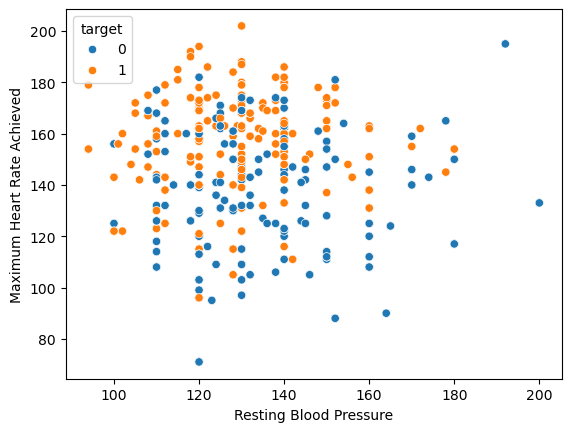

In [14]:
# plot a pair plot to understand the relationships between resting blood pressure and maximum heart rate achieved
sns.scatterplot(data=heart, x='trestbps', y='thalach', hue='target');
plt.xlabel("Resting Blood Pressure")
plt.ylabel("Maximum Heart Rate Achieved");

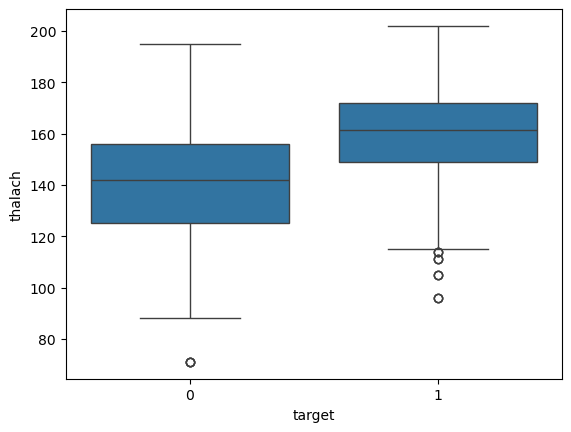

In [15]:
# plot a boxplot to compare the distributions of thalach across the two target groups (0 and 1)
sns.boxplot(data=heart, x='target', y='thalach');

### Data Preprocessing: Cleaning the data, handling missing values, and normalizing features.

In [17]:
# Cleaning the data, handling missing values
heart.dropna(inplace=True)

In [18]:
#check that the shape is the same as befor since there is no missing value dropped
#show total rows and columns of the DataFrame
heart.shape

(1025, 14)

In [19]:
# feature engineering (one hot encoding)
heart = pd.get_dummies(heart, columns=['cp', 'restecg', 'thal', 'slope', 'ca'], drop_first=True)

In [20]:
# selecting features
# split dataset in features and target variable
X = heart.drop('target', axis=1)
y = heart['target']

In [21]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [22]:
# normalizing features
# initializing scaler object
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modeling: Implementing and evaluating machine learning model - Logistic Regression

In [24]:
# train the logistic regression model
heart_logreg = LogisticRegression(random_state=16)
heart_logreg.fit(X_train_scaled, y_train);

In [25]:
# predict the test dataset
y_pred = heart_logreg.predict(X_test_scaled)

### Evaluation: Evaluate your model 

In [27]:
# model evaluation using Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[108,  22],
       [ 16, 111]], dtype=int64)

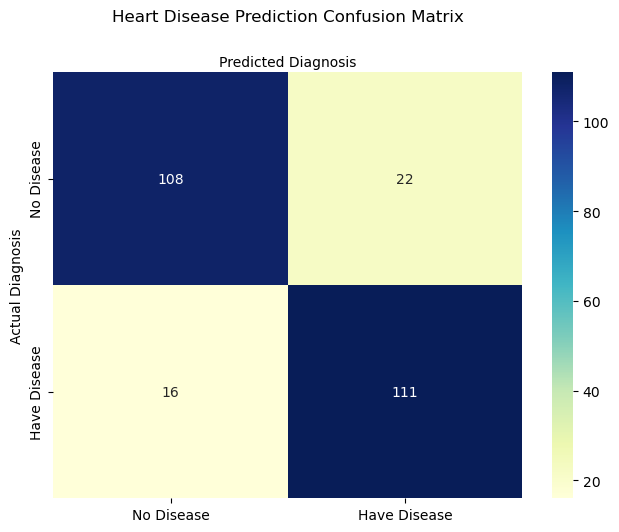

In [28]:
#Visualizing confusion matrix using a heatmap
class_names=['No Disease', 'Have Disease'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', 
            xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Heart Disease Prediction Confusion Matrix', y=1.1)
plt.ylabel('Actual Diagnosis')
plt.xlabel('Predicted Diagnosis');

In [29]:
# evaluate the model using classification_report
target_names = ['no heart disease', 'have heart disease']
print(classification_report(y_test, y_pred, target_names=target_names))

                    precision    recall  f1-score   support

  no heart disease       0.87      0.83      0.85       130
have heart disease       0.83      0.87      0.85       127

          accuracy                           0.85       257
         macro avg       0.85      0.85      0.85       257
      weighted avg       0.85      0.85      0.85       257



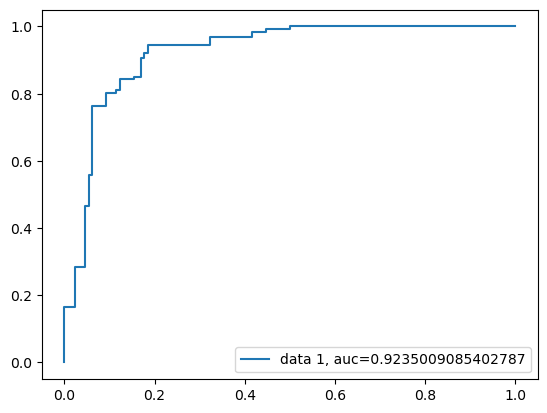

In [30]:
# ROC curve
y_pred_proba = heart_logreg.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()